In [1]:
from src.preprocessing import parse_data, split_train_test
from src.training import trainer
from src.models import LSTM, LSTMAtt, CNN
from src.evaluation import eval_model, get_saliencies, vizualize_saliency, test_attack
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
df, labels = parse_data()

In [3]:
df_train_features, df_train_labels, df_val_features, df_val_labels = split_train_test(df, labels)

In [4]:
print(df_train_features.shape, df_train_labels.shape, df_val_features.shape, df_val_labels.shape)

torch.Size([34, 24, 1]) torch.Size([34]) torch.Size([33, 24, 1]) torch.Size([33])


In [5]:
import torch
torch.unique(labels, return_counts=True)

(tensor([0, 1]), tensor([33, 34]))

In [6]:
torch.unique(df_train_labels, return_counts=True)

(tensor([0, 1]), tensor([13, 21]))

In [7]:
torch.unique(df_val_labels , return_counts=True)

(tensor([0, 1]), tensor([20, 13]))

# Training

In [8]:
n_epochs = 500
tolerance = 100
freq_print = 10

In [9]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

### LSTM

In [10]:
lstm_model = LSTM(1, 10, 1, 2).to(device)

In [11]:
device

'cuda:0'

In [12]:
lstm_model = trainer(
    model=lstm_model,
    n_epochs=n_epochs,
    X_train=df_train_features,
    y_train=df_train_labels,
    X_val=df_val_features,
    y_val=df_val_labels,
    device=device,
    tolerance=tolerance,
    freq_print=freq_print,
)

Epoch = 9, 	Loss = 0.7004604935646057, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 19, 	Loss = 0.6986925005912781, 	Training_acc = 0.5915750915750916, 	Validation_acc = 0.6
Epoch = 29, 	Loss = 0.6636872291564941, 	Training_acc = 0.5384615384615384, 	Validation_acc = 0.525
Epoch = 39, 	Loss = 0.6081110239028931, 	Training_acc = 0.5915750915750916, 	Validation_acc = 0.575
Epoch = 49, 	Loss = 0.6377003192901611, 	Training_acc = 0.5915750915750916, 	Validation_acc = 0.6
Epoch = 59, 	Loss = 0.6769585609436035, 	Training_acc = 0.5915750915750916, 	Validation_acc = 0.5615384615384615
Epoch = 69, 	Loss = 0.5867088437080383, 	Training_acc = 0.6684981684981685, 	Validation_acc = 0.6115384615384616
Epoch = 79, 	Loss = 0.5628491044044495, 	Training_acc = 0.6446886446886447, 	Validation_acc = 0.6365384615384615
Epoch = 89, 	Loss = 0.5796048045158386, 	Training_acc = 0.6684981684981685, 	Validation_acc = 0.6615384615384616
Epoch = 99, 	Loss = 0.6010386943817139, 	Training_acc = 0.668498168498

### LSTMAtt

In [13]:
lstmatt_model = LSTMAtt(1, 30, 1, 2).to(device)

In [14]:
lstmatt_model = trainer(
    model=lstmatt_model,
    n_epochs=n_epochs,
    X_train=df_train_features,
    y_train=df_train_labels,
    X_val=df_val_features,
    y_val=df_val_labels,
    device=device,
    tolerance=tolerance,
    freq_print=freq_print,
)

Epoch = 9, 	Loss = 0.552006721496582, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 19, 	Loss = 0.556179404258728, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 29, 	Loss = 0.5041933059692383, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 39, 	Loss = 0.5069786310195923, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 49, 	Loss = 0.4937761425971985, 	Training_acc = 0.532967032967033, 	Validation_acc = 0.551923076923077
Epoch = 59, 	Loss = 0.49223822355270386, 	Training_acc = 0.532967032967033, 	Validation_acc = 0.551923076923077
Epoch = 69, 	Loss = 0.4732554256916046, 	Training_acc = 0.532967032967033, 	Validation_acc = 0.5903846153846154
Epoch = 79, 	Loss = 0.4677389860153198, 	Training_acc = 0.7472527472527473, 	Validation_acc = 0.7192307692307692
Epoch = 89, 	Loss = 0.45974287390708923, 	Training_acc = 0.913919413919414, 	Validation_acc = 0.8730769230769231
Epoch = 99, 	Loss = 0.45245957374572754, 	Training_acc = 0.913919413919414, 	Validation_acc = 0.89807692307692

### CNN

In [15]:
df_train_features_cnn = df_train_features.transpose(1, 2)
df_val_features_cnn = df_val_features.transpose(1, 2)

In [16]:
cnn_model = CNN(2).to(device)

In [17]:
cnn_model = trainer(
    model=cnn_model,
    n_epochs=n_epochs,
    X_train=df_train_features_cnn,
    y_train=df_train_labels,
    X_val=df_val_features_cnn,
    y_val=df_val_labels,
    device=device,
    tolerance=tolerance,
    freq_print=freq_print,
)

Epoch = 9, 	Loss = 0.6557654142379761, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 19, 	Loss = 0.5968329310417175, 	Training_acc = 0.5, 	Validation_acc = 0.5
Epoch = 29, 	Loss = 0.5284155607223511, 	Training_acc = 0.6923076923076923, 	Validation_acc = 0.625
Epoch = 39, 	Loss = 0.5756182074546814, 	Training_acc = 0.8992673992673992, 	Validation_acc = 0.9
Epoch = 49, 	Loss = 0.5890794396400452, 	Training_acc = 0.9377289377289377, 	Validation_acc = 0.975
Epoch = 59, 	Loss = 0.5601899027824402, 	Training_acc = 0.9761904761904762, 	Validation_acc = 0.975
Epoch = 69, 	Loss = 0.49128931760787964, 	Training_acc = 0.9761904761904762, 	Validation_acc = 0.975
Epoch = 79, 	Loss = 0.5306102633476257, 	Training_acc = 0.9761904761904762, 	Validation_acc = 0.975
Epoch = 89, 	Loss = 0.46013402938842773, 	Training_acc = 0.9761904761904762, 	Validation_acc = 0.975
Epoch = 99, 	Loss = 0.45179086923599243, 	Training_acc = 0.9761904761904762, 	Validation_acc = 1.0
Epoch = 109, 	Loss = 0.4669731855392

# Evaluation

In [18]:
df_test, labels_test = parse_data(data_path='./data/ItalyPowerDemand_TEST.ts')

In [19]:
_ = eval_model(model_name="LSTM", model=lstm_model, X_test=df_test, y_test=labels_test, device=device)

LSTM test accuracy = 0.7494276712452967


In [20]:
_ = eval_model(model_name="LSTM with Attention", model=lstmatt_model, X_test=df_test, y_test=labels_test, device=device)

LSTM with Attention test accuracy = 0.7869520377170316


In [21]:
df_test_cnn = df_test.transpose(1, 2)
_ = eval_model(model_name="CNN", model=cnn_model, X_test=df_test_cnn, y_test=labels_test, device=device)

CNN test accuracy = 0.951442721791559


# Saliency

### CNN model

In [22]:
df_cnn = df.transpose(1, 2).to(device)

In [23]:
preds = cnn_model(df_cnn).cpu().detach().argmax(-1).numpy()

In [24]:
saliencies_0, saliencies_1 = get_saliencies(
    model=cnn_model,
    X=df_cnn,
    y=labels,
    device=device
)
# Only for CNN model
saliencies_0 = np.transpose(saliencies_0, (0, 1, 2))
saliencies_1 = np.transpose(saliencies_1, (0, 1, 2))

52


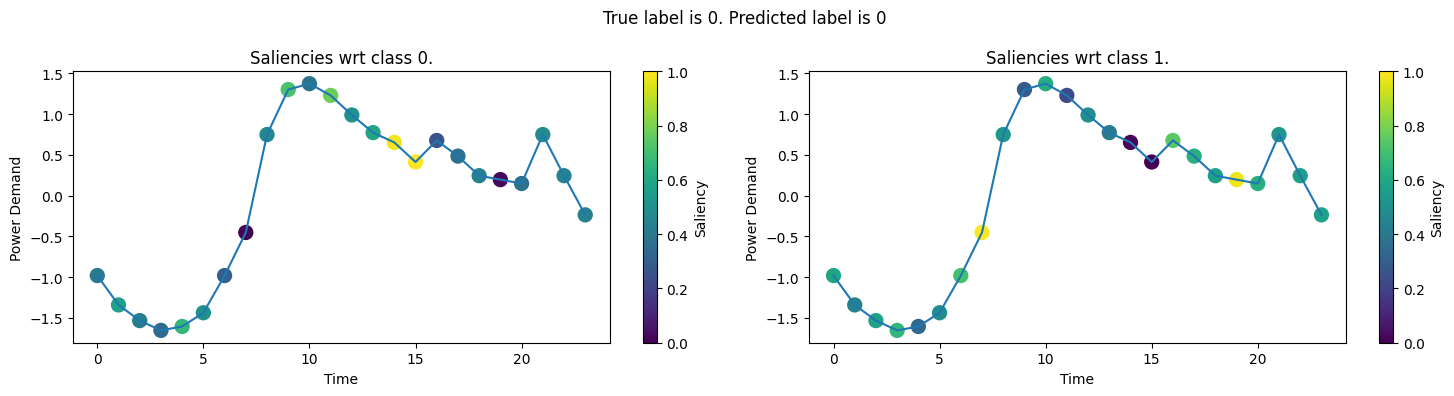

30


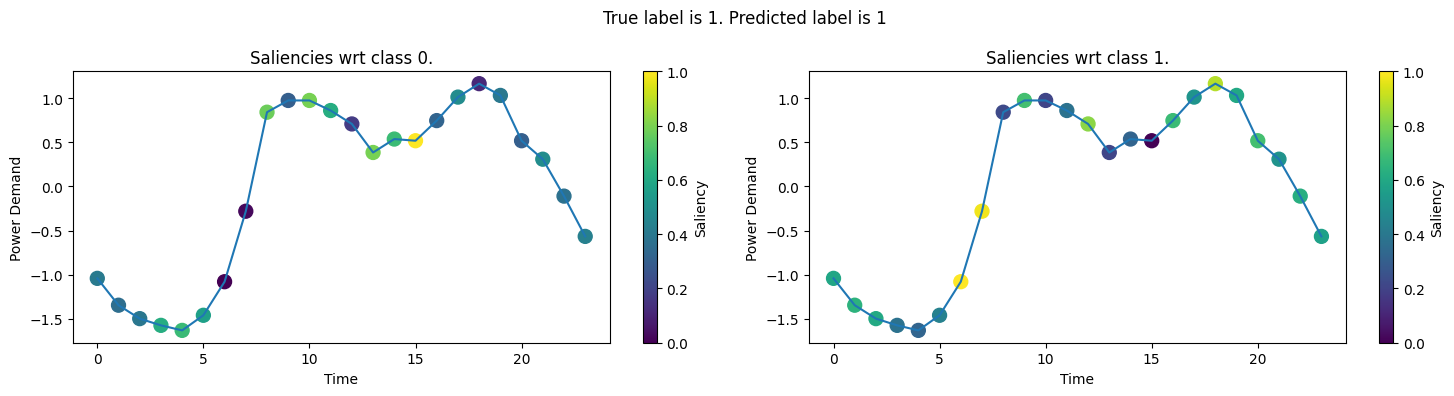

66


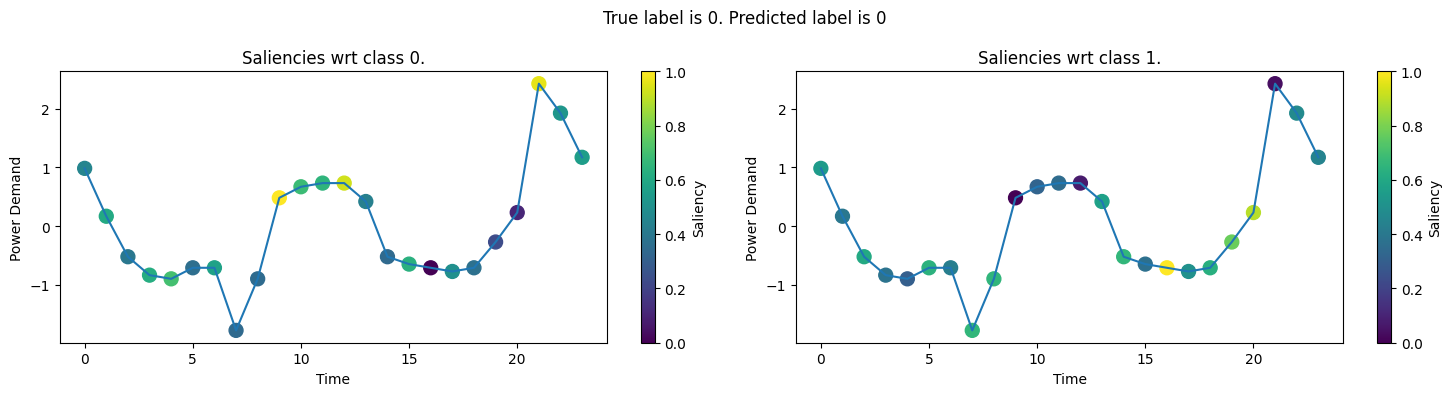

In [25]:
for _ in range(3):
    i = np.random.randint(low=0, high=len(df), )
    print(i)
    vizualize_saliency(
        df=df,
        labels=labels,
        index_=i,
        saliencies_0=saliencies_0,
        saliencies_1=saliencies_1,
        preds=preds,
    )

### FGSM attack (CNN)

In [26]:
epsilons = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
accuracies = []
perturbed_data_dict = {}
predicted_label_dict = {}

for eps in epsilons:
    acc, perturbed_data, predicted_labels = test_attack(model=cnn_model, data_=df_cnn, labels_=labels, epsilon=eps, device=device)
    accuracies.append(acc)
    perturbed_data_dict[eps] = perturbed_data
    predicted_label_dict[eps] = predicted_labels

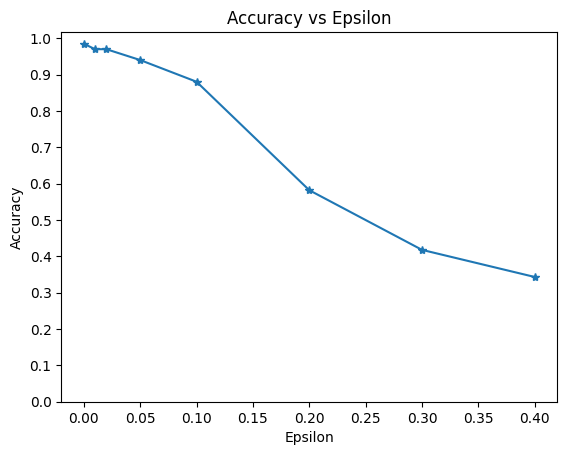

In [27]:
plt.plot(epsilons, accuracies, '*-')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

Current epsilon is 0


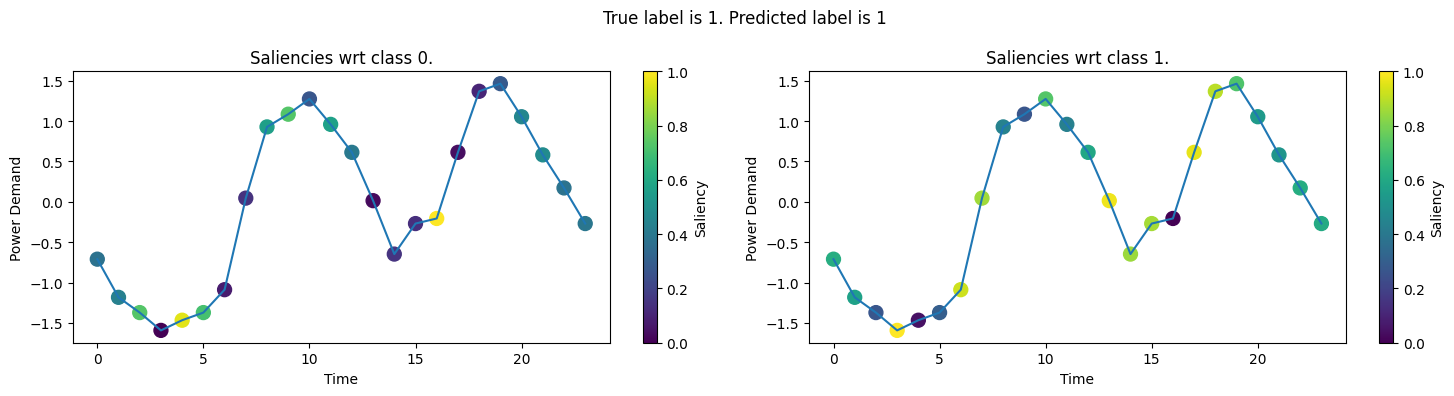

Current epsilon is 0.01


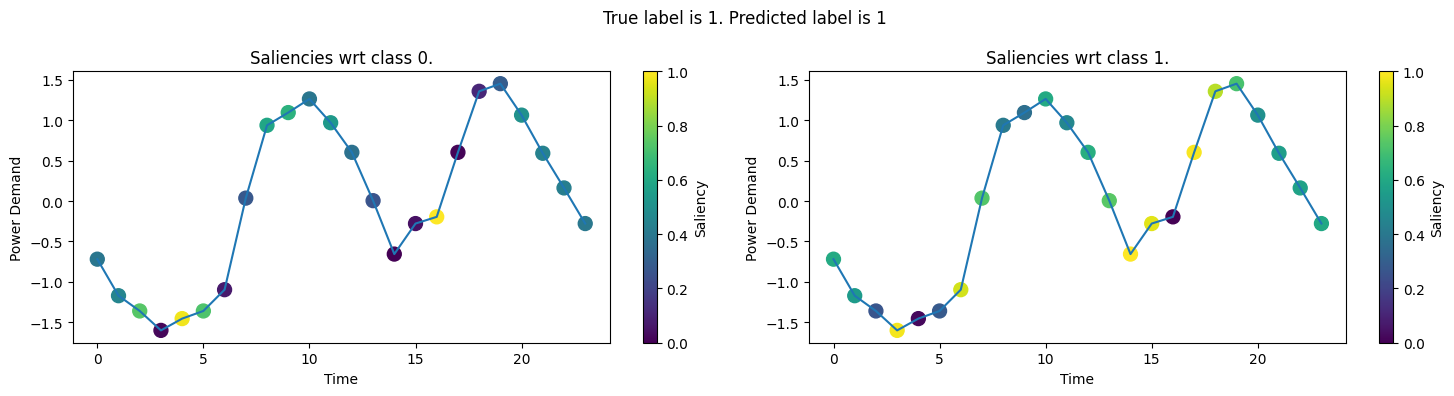

Current epsilon is 0.02


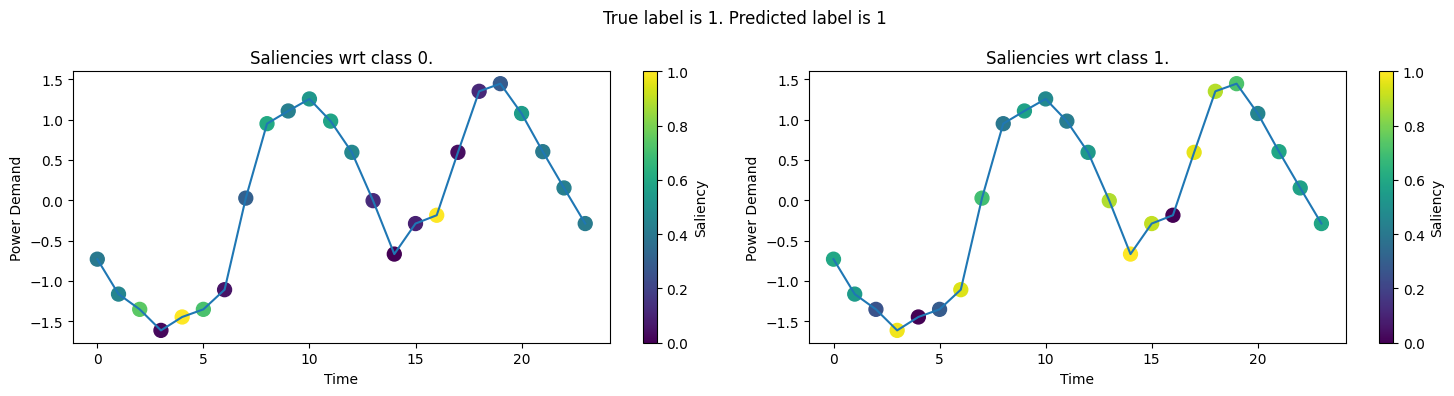

Current epsilon is 0.05


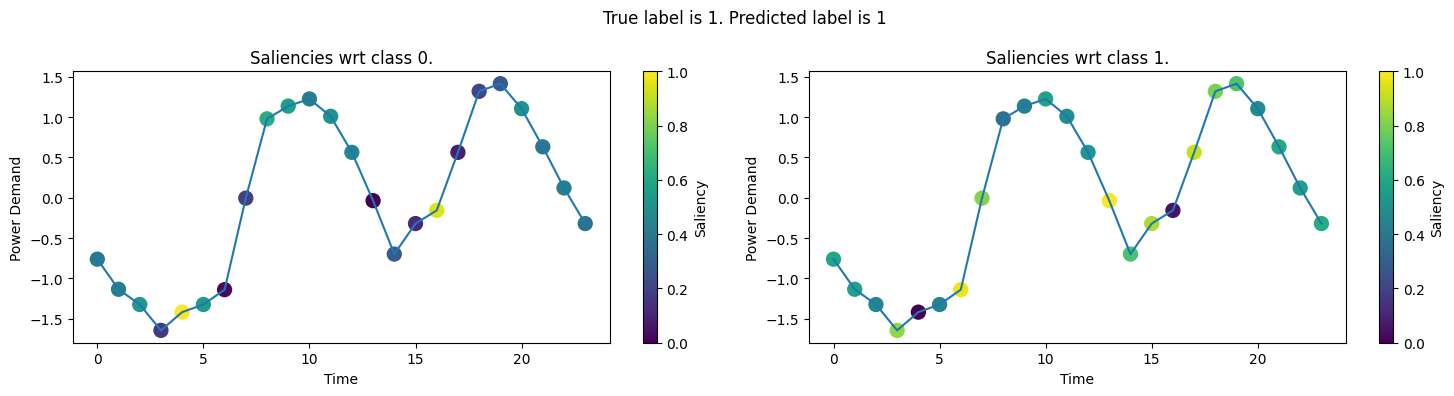

Current epsilon is 0.1


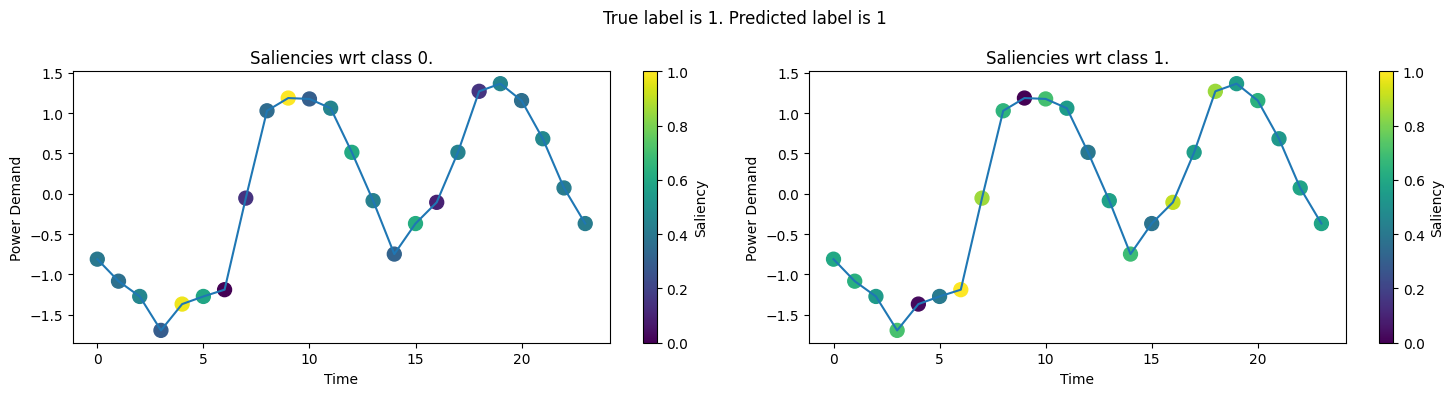

Current epsilon is 0.2


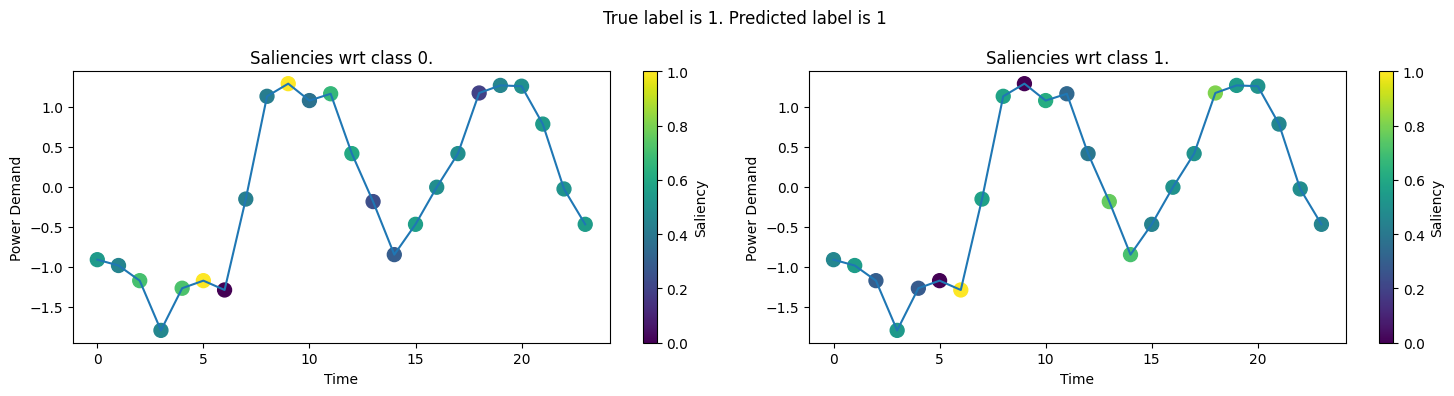

Current epsilon is 0.3


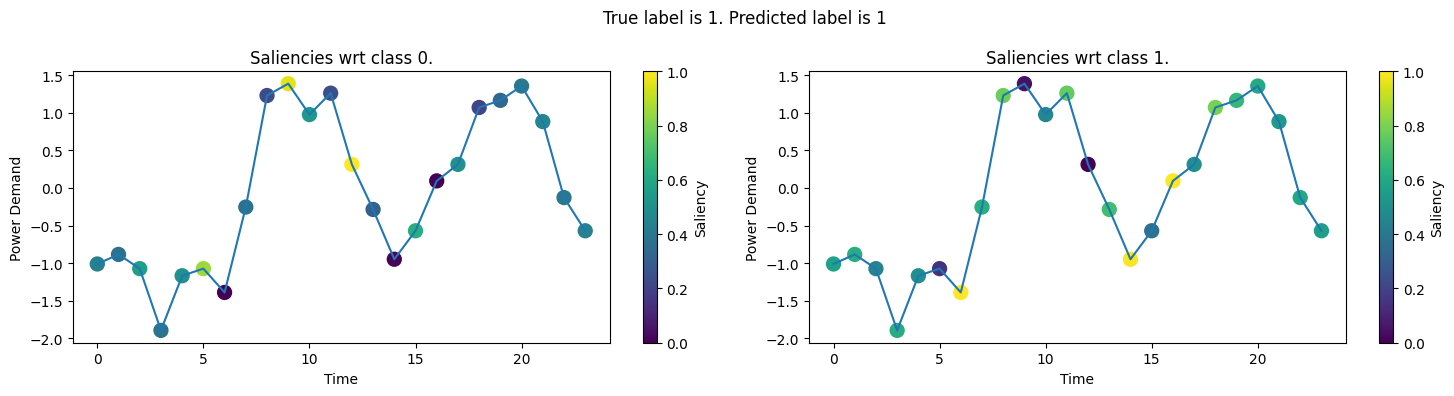

Current epsilon is 0.4


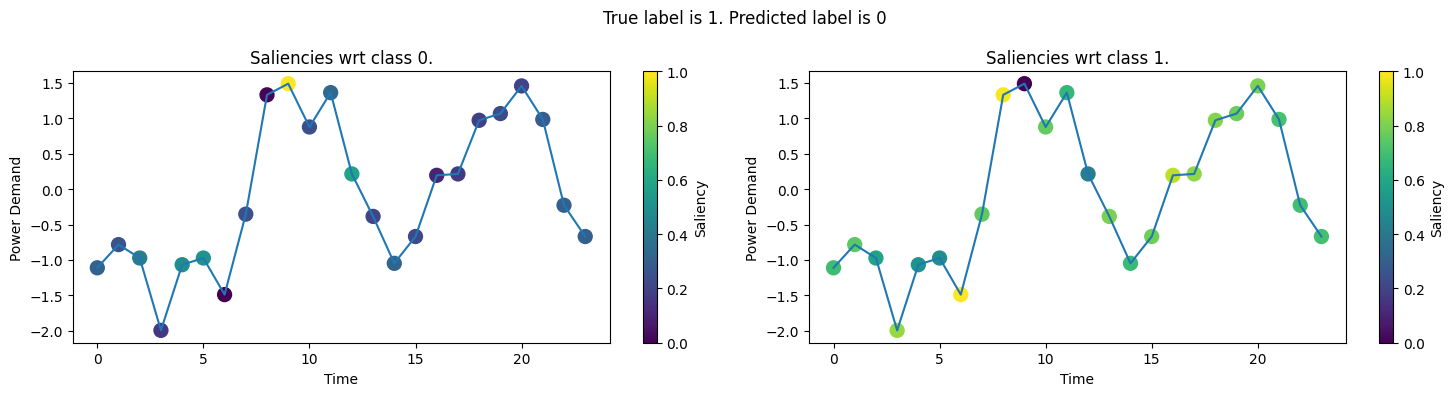

In [28]:
index_ = 0

for eps in epsilons:
    print(f"Current epsilon is {eps}")

    X_perturbed = torch.tensor(perturbed_data_dict[eps])

    saliencies_0_, saliencies_1_ = get_saliencies(
        model=cnn_model,
        X=X_perturbed,
        y=labels,
        device=device
    )
    saliencies_0_ = np.transpose(saliencies_0_, (0, 1, 2))
    saliencies_1_ = np.transpose(saliencies_1_, (0, 1, 2))
    
    vizualize_saliency(
        df=X_perturbed,
        labels=labels,
        index_=index_,
        saliencies_0=saliencies_0_,
        saliencies_1=saliencies_1_,
        preds=predicted_label_dict[eps],
    )